In [72]:
import csv
import re
from random import shuffle
import pandas as pd
import numpy as np
import math
import operator
import matplotlib.pyplot as plt
from collections import Counter
from time import time
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

In [73]:
# Load data
df_x = pd.read_csv('train_set_x.csv', index_col='Id').values
df_y = pd.read_csv('train_set_y.csv', index_col='Id').values
valid = pd.read_csv('test_set_x.csv', index_col='Id').values

In [74]:
## PREPROCESSING
#stats_pre = [('Size', len(df))]
# Remove empty samples
#row_empty = []
#for i, r in enumerate(df):
#    if not type(r[0]) is str:
#        if np.isnan(r[0]):
#            row_empty.append(i)
#df_pre_es = np.delete(df, row_empty, axis=0)
#df_x = np.delete(df_x, row_empty, axis=0)
#df_y = np.delete(df_y, row_empty, axis=0)
#stats_pre.append(('Empty Samples', len(row_empty)))

In [75]:
df_x[pd.isnull(df_x)] = '' #potentially uses tab chars instead
valid[pd.isnull(valid)] = ''
df = np.concatenate((df_x,df_y), axis=1)

# Data Exploration

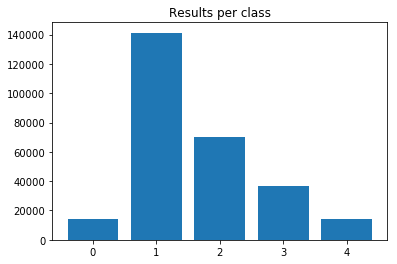

In [76]:
# Count number of results per class
class_count = dict()
for i in df_y:
    if i[0] in class_count:
        class_count[i[0]] += 1
    else:
        class_count[i[0]] = 1
plt.bar(list(class_count.keys()), list(class_count.values()))
plt.title('Results per class')
plt.show()

In [ ]:
# Plot distribution of letters per class for training_data
cnt_alphas = []
cnt_specials = []
for i in list(class_count.keys()):
    #df_split.append(df[np.where(df[:,1]==i),0].tolist()[0])
    class_data = df[np.where(df[:,1]==i),0].tolist()[0]
    c_a = Counter()
    c_s = Counter()
    for sample in class_data:
        c_a += Counter(re.findall(r'[a-zA-z0-9]', sample.lower()))
        c_s += Counter(re.findall(r'[^ a-zA-z0-9\s]', sample.lower()))
    cnt_alphas.append(c_a)
    cnt_specials.append(c_s)

In [78]:
#Plot distribution of letters per class for test_data
cnt_t_alphas = []
cnt_t_specials = []
test_data = test.tolist()
for sample in test_data:
 c_t_a += Counter(re.findall(r'[a-zA-z0-9]', sample[0]))
 c_t_s += Counter(re.findall(r'[^ a-zA-z0-9\s]', sample[0]))

NameError: name 'test' is not defined

# Modelling

Training code starts here on Multinomial Naive Bayes.
There doesn't seem to be a correlation between cross-validation accuracy and test set accuracy. Probably because the test set was generated with the assumption that letters were sampled randomly but only once per word. The CountVectorizer was performed using Bag-of-Words (actually characters) 

In [80]:
# Data Splitting
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=14)
x_test_gen = [[] for i in range(len(x_test))]
for i, test_samples in enumerate(x_test):
    sequence = list(re.sub(r'\s', '', test_samples[0]))
    shuffle(sequence)
    if len(sequence) > 10:
        sequence = sequence[:10]
    sequence = ' '.join(sequence)
    
    
    #for words in re.split(r'\s+', test_samples[0]):
    #    if words == '':
    #        sequence.append('')
    #    else:
    #        sequence.append(words[np.random.randint(0,len(words))])
    x_test_gen[i] = sequence
x_test_gen = np.array(x_test_gen)

In [44]:
# Naive Bayes - Multinomial
# Model Selection
#pipeline_nb_m = Pipeline([
 #   ('vect', CountVectorizer(analyzer='char')),
  #  ('trsf', TfidfTransformer(sublinear_tf=True)),
   # ('clf', MultinomialNB(alpha=0)),
#])
#parameters_nb_m = {
 #   'vect__ngram_range': [(1,1),(1,2)],
    #'vect__lowercase': (True, False),
  #  'vect__max_df': (1.0, 0.99, 0.9),
   # 'trsf__use_idf': (True, False) 
#}
#t_nb_m = time()
#gs_nb = GridSearchCV(pipeline_nb_m,parameters_nb_m, n_jobs=-1)
#gs_nb = gs_nb.fit(x_train.flatten().tolist(),y_train.flatten().tolist())
#print ('Done %03f' % (time() - t_nb_m))
#pred_nb = gs_nb.predict(x_test_gen.flatten().tolist())
#print ('Naive Bayes %02.02f%%' % (np.mean(pred_nb == y_test.flatten().tolist())*100))

In [81]:
#euclidian Distance calculation function
def EuclidianDis(point1, point2, length):
    dist = 0
    for x in range(length):
        dist += pow((point1[x] - point2[x]), 2)
    return math.sqrt(dist)

In [82]:

#The function for getting the K neighbors  
def GetNeighbors(TrainingData, TestData,k):
    distances = []
    length = len(TestData) - 1
    for y in range(len(TrainingData)):
        interval = EuclidianDis(TestData, TrainingData[y], length)
        distances.append((TrainingData[y], interval))
    distances.sort(key = operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[y][0])
    return neighbors

In [83]:
# the prediction response based on neighbors
def PredictedResponse(neighbors):
	Votes = {}
	for x in range(len(neighbors)):
		res = neighbors[x][-1]
		if res in Votes:
			Votes[res] += 1
		else:
			Votes[res] = 1
	sortedVotes = sorted(Votes.iteritems(), key=operator.itemgetter(1), reverse=True)
	return sortedVotes[0][0]

In [84]:
#print ('NAIVE BAYES')
#print ('Accuracy %02.02f%%' % (gs_nb.best_score_*100))
#for param_name in sorted(parameters_nb_m.keys()):
 #   print ('%s: %r' % (param_name, gs_nb.best_params_[param_name]))

In [85]:
#the accuracy of obtained predictions
def getAccuracy(TestSet, predictions):
	correct = 0
	for x in range(len(TestSet)):
		if TestSet[x][-1] is predictions[x]:
			correct += 1
	return (correct/float(len(TestSet))) * 100.0

In [96]:
#Spliting the dataset
#def loadDataset(filename, split, trainingSet=[] , testSet=[]):
#	with open(filename, 'rb') as csvfile:
#	    lines = csv.reader(csvfile)
#	    dataset = list(lines)
#	    for x in range(len(dataset)-1):
#	        for y in range(4):
#	            dataset[x][y] = float(dataset[x][y])
#	        if random.random() < split:
#	            trainingSet.append(dataset[x])
#	        else:
#	            testSet.append(dataset[x])

In [97]:
#pred_nb = gs_nb.predict(x_test_gen.flatten().tolist())
#print ('Naive Bayes %02.02f%%' % (np.mean(pred_nb == y_test.flatten().tolist())*100))

In [99]:
def main():
   trainingSet=[]
   testSet=[]
   predictions=[]
   k = 3
   for x in range(len(testSet)):
	neighbors = GetNeighbors(x_train.flatten().tolist(), x_test_gen.flatten().tolist(), k)
	result = PredictedResponse(neighbors)
	predictions.append(result)
	print('> predicted=' + repr(result) + ', actual=' + repr(testSet[x][-1]))
	accuracy = getAccuracy(x_test_gen.flatten().tolist(), predictions)
	print('Accuracy: ' + repr(accuracy) + '%')
	
main()

In [91]:
# Saving predictions to an output file for submission to the competition
#filename = 'nb0.csv'
#predictions = gs_nb.predict(valid.flatten().tolist())
#with open(filename,'w') as out:
 #   for i, e in enumerate(predictions):
  #      out.write(str(i))
   #     out.write(',')
    #    out.write(str(e))
     #   out.write('\n')